In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

### Linear Regression :
<h4><p></p>
    * scater plot <p></p>
* Linear regression model (object) <p></p>
* Fit(2d,1d) <p></p>
* predict(2d) <p></p>
* regression line plotting : plt.plot(df.independent, reg.predict(df[['independent']])) <p></p>
* more predictions <p></p> </h4>
 2d and 1d are tthe dimensions which are necessary.

In [65]:
df = pd.read_csv('houses.csv')

In [66]:
df

,area,price
0,2500,2000000
1,2900,2800000
2,3300,4000000
3,3600,4500000
4,4000,5300000
5,4200,6100000
6,4500,6900000


### SCATTER PLOT

Text(0.5, 1.0, 'House Predictions')

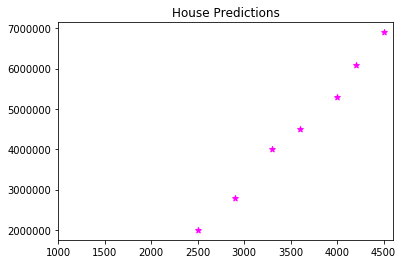

In [67]:
plt.scatter(x='area',y='price',data=df,color='magenta',marker='*')
plt.xlim(1000,None)
plt.title('House Predictions')

### LINEAR_MODEL , FIT, PREDICT

In [68]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
reg.predict([[3400]])

array([4099633.02752294])

### VALUES OF COEF (m) & INTERCEPT (b)

In [50]:
print("line : y = m*x + b")
print("price = m * area + intercept")
print()
print("slope is (m):")
print(reg.coef_)
print()
print('Intercept is (b):')
print(reg.intercept_)

line : y = m*x + b
price = m * area + intercept

slope is (m):
[2418.80733945]

Intercept is (b):
-4124311.926605504


### REGRESSION LINE :

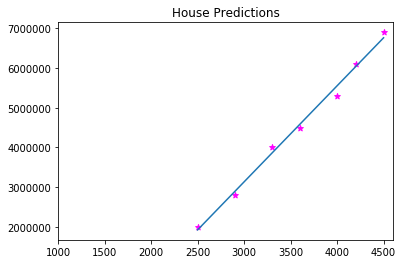

In [73]:
plt.scatter(x='area',y='price',data=df,color='magenta',marker='*')
plt.xlim(1000,None)
plt.title('House Predictions')
plt.plot(df.area,reg.predict(df[['area']]))

### TALLY

In [53]:
#let's tally
x = int(input("enter the area for which you want to predict the price :\n"))
y = reg.coef_ * x + reg.intercept_
print(f'{y} is the price for area {x}')

enter the area for which you want to predict the price :
3400
[4099633.02752294] is the price for area 3400


### Now prediction of some more areas and storing it in df then to csv

In [57]:
areas = [100,1400,1700,4400,5000,15000]
areas = np.array(areas)
d1 = pd.DataFrame(areas,columns=['Areas'])
d1

,Areas
0,100
1,1400
2,1700
3,4400
4,5000
5,15000


In [60]:
p = reg.predict(d1)

In [61]:
d1['Predicted Prices'] = p

In [62]:
d1

,Areas,Predicted Prices
0,100,-3.882431e+06
1,1400,-7.379817e+05
2,1700,-1.233945e+04
3,4400,6.518440e+06
4,5000,7.969725e+06
5,15000,3.215780e+07


In [63]:
d1.to_csv("Some predictions")

### Csv file with the given areas has been created !

### ANOTHER EXAMPLE WITH CANADA GDP

### read csv

In [4]:
data = pd.read_csv('canaada_gdp.csv')
gdp = pd.DataFrame(data)
gdp.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


### Scatter plot

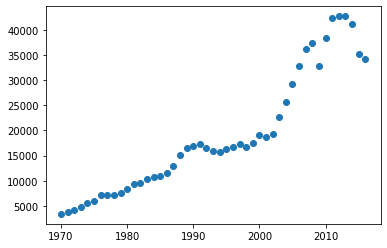

In [5]:
plt.scatter(x='year',y='per capita income (US$)',data=gdp)

### Model

In [6]:
reg2 = linear_model.LinearRegression()
reg2.fit(gdp[['year']],gdp['per capita income (US$)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print('GDP OF CANADA IN YEAR 2020 AS PER THE QUESTION')
reg2.predict([[2020]])

GDP OF CANADA IN YEAR 2020 AS PER THE QUESTION


array([41288.69409442])

### COEFFICIENTS :

In [8]:
print("  y = m*x + b")
print("gdp = m*year + b")
print()
print("Slope is :(m) ")
print(reg2.coef_)
print()
print("Intercept is :(b) ")
print(reg2.intercept_)

  y = m*x + b
gdp = m*year + b

Slope is :(m) 
[828.46507522]

Intercept is :(b) 
-1632210.7578554575


### REGRESSION LINE:

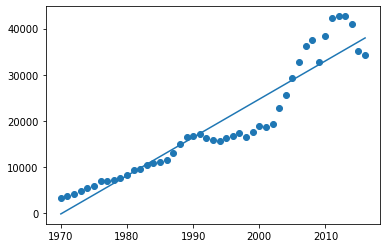

In [9]:
plt.scatter(x='year',y='per capita income (US$)',data=gdp)
plt.plot(gdp.year,reg2.predict(gdp[['year']]))

#plt.plot(df.independent, reg.predict(df[['independent']]))

### SAVING MODEL TO FILE (reg2)
### Dump and Load and Predict

### Usin Pickle Module

In [10]:
import pickle

In [13]:
with open('pickle_import','wb') as f:
    pickle.dump(reg2,f)

In [14]:
with open('pickle_import','rb') as f:
    obj = pickle.load(f)

In [15]:
obj.predict([[2020]])

array([41288.69409442])

### Using Joblib from Sklearn

In [17]:
from sklearn.externals import joblib

In [20]:
joblib.dump(reg2,'joblib_import.pkl')

['joblib_import.pkl']

In [21]:
obj2 = joblib.load('joblib_import.pkl')

In [23]:
obj2.predict([[2020]])

array([41288.69409442])